# load KCWI measurements

In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data, header = fits.getdata('../kcwi_extractions/extracted_dispersions/'
                            'KCWI_RXJ1131_icubes_mosaic_0.1457_crop.fits', header=True)

#data_no_quasar = np.empty_like(data_crop[0].data)
#noise_cube = np.empty_like(data_crop[0].data)

# data = np.loadtxt('../kcwi_extractions/extracted_dispersions'
#                    '/KCWI_RXJ1131_icubes_mosaic_0.1457_total.txt')

In [3]:
noise, header = fits.getdata('../kcwi_extractions/extracted_dispersions'
                         '/KCWI_RXJ1131_icubes_mosaic_0.1457_noise.fits', header=True)
# noise = np.loadtxt('../kcwi_extractions/extracted_dispersions'
#                    '/KCWI_RXJ1131_icubes_mosaic_0.1457_total_noise.txt')
#np.ones_like(data) * 0.014

In [4]:
data.shape, noise.shape

((5215, 43, 43), (5215, 43, 43))

In [5]:
import sys
sys.path.append("/Users/ajshajib/Research/RXJ1131_KCWI/kcwi_extractions/")

from kcwi_util_modified import *

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


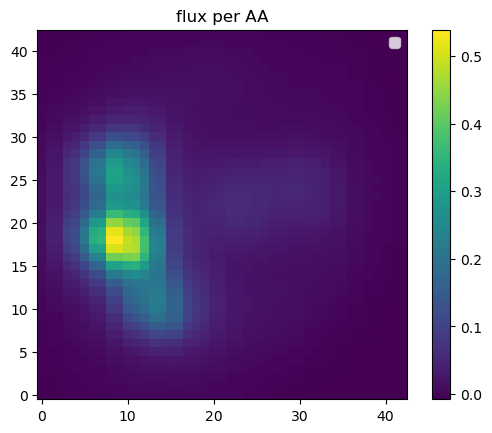

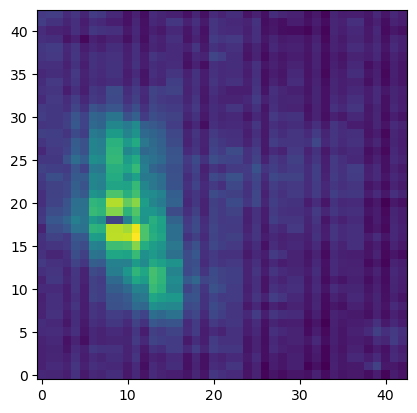

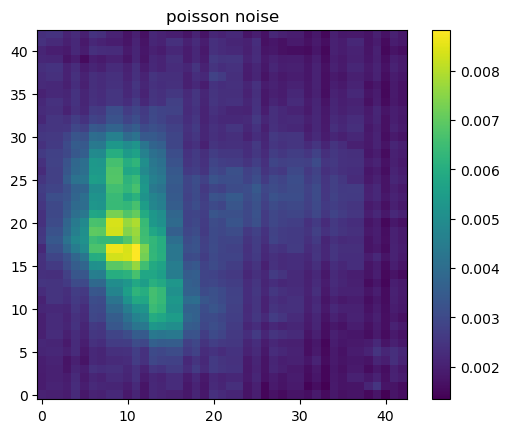

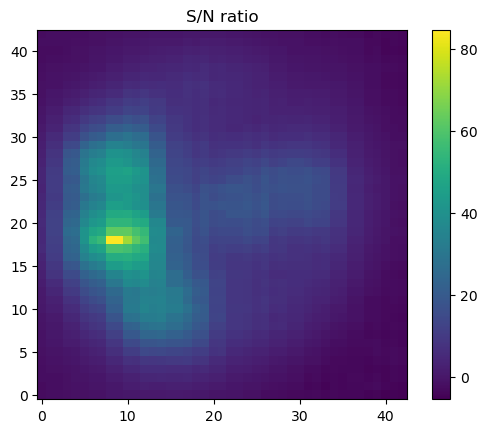

In [6]:
SN_per_AA, flux_per_AA, sigma_poisson = SN_CaHK(3663, 3922, data, noise,
                                                15960);

In [7]:
data_2d = flux_per_AA #np.sum(data, axis=0)
noise_2d = sigma_poisson #np.sqrt(np.sum((noise)**2, axis=0))

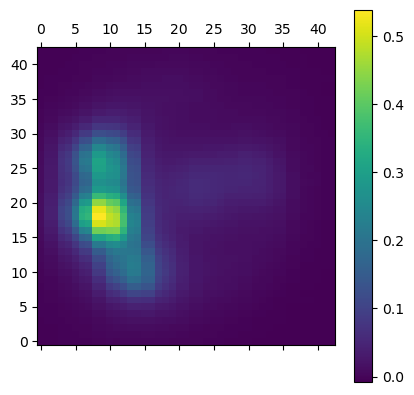

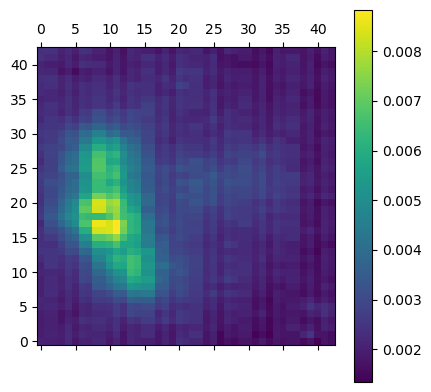

In [8]:
cbar = plt.matshow(data_2d, origin='lower')
plt.colorbar(cbar)
plt.show()

cbar = plt.matshow(noise_2d, origin='lower')
plt.colorbar(cbar)

# load hst template

In [9]:
full_image, header = fits.getdata('./data_products/hst_imaging_and_lens_model_products/RXJ1131_F814W_cutout_sci.fits', header=True)

/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_25743/1939324291.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(full_image), origin='lower');


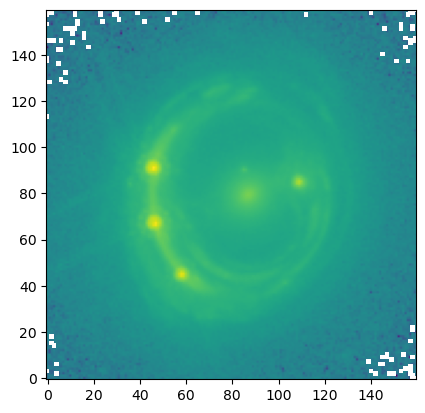

In [10]:
plt.imshow(np.log10(full_image), origin='lower');

### find center of image A

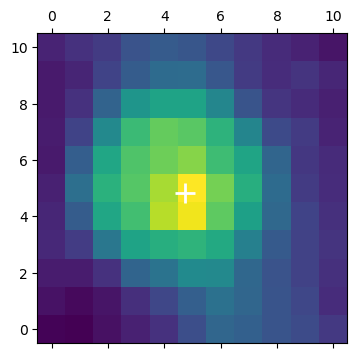

In [11]:
from photutils.centroids import centroid_2dg

data = full_image[62:73, 42:53]
xycen = centroid_2dg(data)

fig, ax = plt.subplots(1, 1, figsize=(4, 5))

ax.matshow(np.log10(data), origin='lower', interpolation='nearest')
marker = '+'
ms, mew = 15, 2.0
plt.plot(*xycen, color='w', marker=marker, ms=ms, mew=mew)


/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_25743/2253489819.py:3: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(full_image), origin='lower', interpolation='nearest')


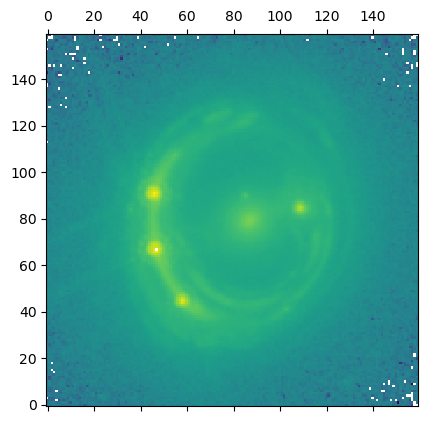

In [12]:
# fig, ax = plt.subplots(1, 1, figsize=(4, 5))

plt.matshow(np.log10(full_image), origin='lower', interpolation='nearest')
plt.plot(xycen[0]+42, xycen[1]+62, color='w', marker=marker, ms=2, mew=mew)


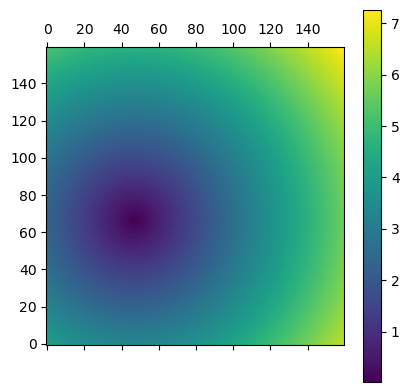

In [13]:
# create a grid of x and y values for full images with step 0.04
x_hst = np.arange(0, full_image.shape[1]) - xycen[1] - 42
y_hst = np.arange(0, full_image.shape[0]) - xycen[0] - 62

x_hst *= 0.05
y_hst *= 0.05

x_hst_grid, y_hst_grid = np.meshgrid(x_hst, y_hst)

plt.matshow(np.sqrt(x_hst_grid**2 + y_hst_grid**2), origin='lower')
plt.colorbar()

## create KCWI grid

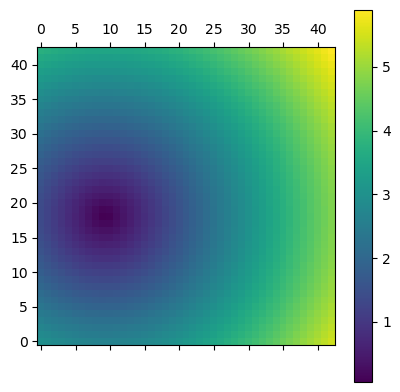

In [14]:
pixel_size = 0.1457


kcwi_x_image = np.array([ 9.36382914,  9.09615584, 13.32402132, 30.71592249])
kcwi_y_image = np.array([18.10736733, 26.21992739, 10.47524653, 24.11972148])

x_kcwi, y_kcwi = np.arange(0, 43), np.arange(0, 43)

x_kcwi = x_kcwi - kcwi_x_image[0]
y_kcwi = y_kcwi - kcwi_y_image[0]

x_kcwi *= pixel_size #/ 0.05
y_kcwi *= pixel_size #/ 0.05

x_kcwi_grid, y_kcwi_grid = np.meshgrid(x_kcwi, y_kcwi)

plt.matshow(np.sqrt(x_kcwi_grid**2 + y_kcwi_grid**2), origin='lower')
plt.colorbar()

In [15]:
x_kcwi_grid.shape

(43, 43)

In [16]:
delta_x = (x_kcwi_grid[0, 1] - x_kcwi_grid[0, 0])
delta_y = (y_kcwi_grid[1, 0] - y_kcwi_grid[0, 0])
print( np.abs(delta_x), np.abs(delta_y) )

supersampling_factor = 3

x_start = x_kcwi_grid[0, 0] - delta_x / 2. * (1 - 1 / supersampling_factor)
x_end = x_kcwi_grid[0, -1] + delta_x / 2. * (1 - 1 / supersampling_factor)
y_start = y_kcwi_grid[0, 0] - delta_y / 2. * (1 - 1 / supersampling_factor)
y_end = y_kcwi_grid[-1, 0] + delta_y / 2. * (1 - 1 / supersampling_factor)

n_x, n_y = x_kcwi_grid.shape
xs = np.linspace(x_start, x_end, n_x * supersampling_factor)
ys = np.linspace(y_start, y_end, n_y * supersampling_factor)

x_grid_supersampled, y_grid_supersampled = np.meshgrid(xs, ys)

0.14569999999999994 0.14570000000000016


## Interpolate HST image



In [17]:
from scipy.interpolate import interp2d
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve

In [18]:
def get_kcwi_model(x_0, y_0, fwhm, amp=1):
    """
    :param x_0: x position of image A
    :param y_0: y position of image A
    :param sigma: sigma of the Gaussian
    """
    sigma = np.sqrt((fwhm/2.355)**2 - (0.1/2.355)**2) / 0.05
    kernel = Gaussian2DKernel(x_stddev=sigma,
                              x_size=4*int(sigma)+1,
                              y_size=4*int(sigma)+1)

    hst_convolved = convolve(full_image, kernel)
    hst_interp = interp2d(x_hst, y_hst, hst_convolved, kind='cubic')
    interped_image = hst_interp(xs+x_0, ys+y_0)

    kcwi_model = interped_image.reshape(
                43, supersampling_factor,
                43, supersampling_factor
            ).sum(3).sum(1)

    return amp * 0.008 * kcwi_model


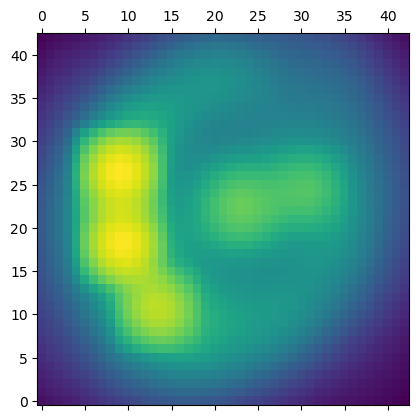

In [19]:
plt.matshow(np.log10(get_kcwi_model(0, 0, 0.9)), origin='lower')

## mcmc

In [20]:
x_0_guess, y_0_guess = 0, 0

def log_probability(params):
    """
    """
    x_0, y_0, fwhm, amp = params

    if not (x_0_guess-0.5 < x_0 < x_0_guess+0.5) \
            or not (y_0_guess-0.5 < y_0 < y_0_guess+0.5) \
            or not (0.5 < fwhm < 2):
        return -np.inf
    
    light_model = get_kcwi_model(x_0, y_0, fwhm, amp=amp)
    
    log_prob = -0.5 * np.nansum((data_2d - light_model)**2 /
                                noise_2d**2)

    if np.isnan(log_prob):
        return -np.inf
    elif np.isinf(log_prob):
        return -np.inf
    else:
        return log_prob


In [21]:
log_probability([0, 0, 1, 1]) * 1

-36917.52499009396

In [22]:
import emcee

In [23]:
nwalkers, ndim = 80, 4
init_pos = np.random.normal(loc=[x_0_guess, y_0_guess, 0.9, 1],
                            scale=0.1,
                            size=(nwalkers, ndim))


sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)

sampler.run_mcmc(init_pos, 120, progress=True);


100%|██████████| 120/120 [03:58<00:00,  1.98s/it]


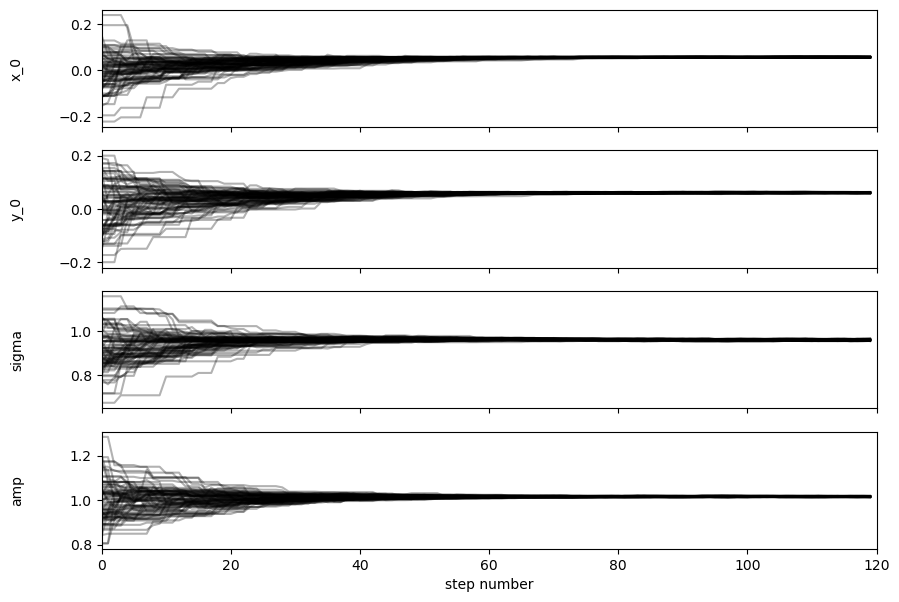

In [24]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["x_0", "y_0" , "sigma", 'amp'][:ndim]

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [25]:
x_0, y_0, fwhm_0, amp = np.median(samples[-30::10, :, :].reshape(-1, ndim),
                              axis=0)

x_0, y_0, fwhm_0

(0.05720070453612139, 0.06092980274890847, 0.9594714006475773)

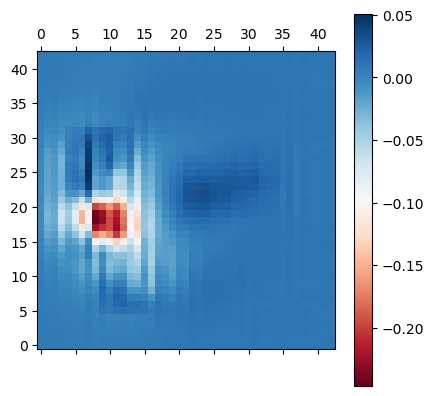

In [26]:
plt.matshow((get_kcwi_model(x_0, y_0, fwhm_0, amp) - data_2d),# / noise_2d,
            origin='lower', cmap='RdBu',
            #vmax=5, vmin=-5
            )
plt.colorbar()

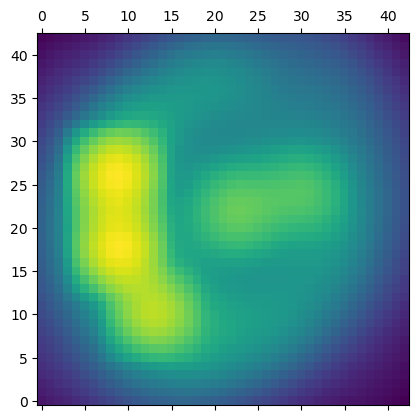

In [27]:
plt.matshow(np.log10(get_kcwi_model(x_0, y_0, fwhm_0, amp)), origin='lower')

In [28]:
'PSF FWHM', fwhm_0

('PSF FWHM', 0.9594714006475773)

In [29]:
x_0_pixel = x_0 * pixel_size + kcwi_x_image[0]
y_0_pixel = y_0 * pixel_size + kcwi_y_image[0]

In [30]:
delta_x = (2.383 - 4.411) / pixel_size
delta_y = (3.412 - 4.011) / pixel_size

In [31]:
x_0_pixel - delta_x, y_0_pixel - delta_y

(23.291174950461482, 22.22743217357143)

In [32]:
delta_x_s = (2.383 - 4.323) / pixel_size
delta_y_s = (3.412 - 4.546) / pixel_size

x_0_pixel - delta_x_s, y_0_pixel - delta_y_s

(22.687194168031837, 25.899360794024414)

In [33]:
x_0 / pixel_size + kcwi_x_image, y_0 / pixel_size + kcwi_y_image

(array([ 9.75642148,  9.48874818, 13.71661366, 31.10851483]),
 array([18.52555403, 26.63811409, 10.89343323, 24.53790818]))